# To do
## 1. Classification on Churn Data


## Data 1
### Churn Data
#### About the data
* Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
* The raw data contains 7043 rows (customers) and 21 columns (features).
* The “Churn” column is our target.

## Step 1:
## Data Collection

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Step 2:
## Assessment

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [9]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [10]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [11]:
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [12]:
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
64     80
56     80
16     80
     ... 
20     71
62     70
41     70
53     70
32     69
54     68
47     68
50     68
51     68
58     67
49     66
43     65
42     65
31     65
34     65
37     65
57     65
55     64
40     64
48     64
33     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [13]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [14]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [15]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [16]:
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [17]:
df.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [18]:
df.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [19]:
df.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [20]:
df.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [21]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [22]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

## Step 3
## EDA

##### 1.Churn Data

In [23]:
df[df['Churn']=='Yes'].count()

customerID          1869
gender              1869
SeniorCitizen       1869
Partner             1869
Dependents          1869
tenure              1869
PhoneService        1869
MultipleLines       1869
InternetService     1869
OnlineSecurity      1869
OnlineBackup        1869
DeviceProtection    1869
TechSupport         1869
StreamingTV         1869
StreamingMovies     1869
Contract            1869
PaperlessBilling    1869
PaymentMethod       1869
MonthlyCharges      1869
TotalCharges        1869
Churn               1869
dtype: int64

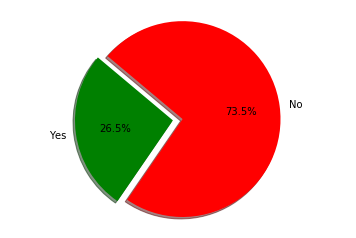

In [24]:
labels = 'Yes', 'No' #https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
sizes = [1869,5174]
colors = ['green','red']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

 
plt.axis('equal')
plt.show()


##### 2.Different Features and Churn 

Text(0.5,1,'Gender v/s Churn')

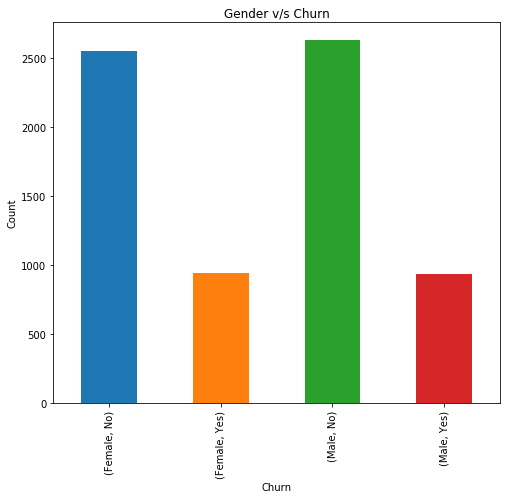

In [25]:
df.groupby('gender')['Churn'].value_counts().plot(kind='bar',figsize=(8,7),)
plt.ylabel('Count')
plt.xlabel('Churn')
plt.title('Gender v/s Churn')

###### Inference
* Gender has no effect on the churn data, it can be discarded while training the model

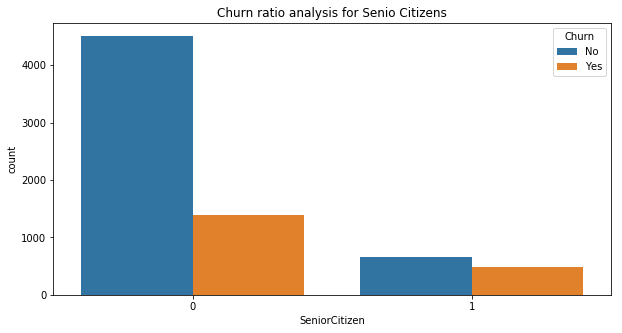

In [26]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Churn ratio analysis for Senio Citizens')
sns.countplot(df['SeniorCitizen'],hue=df['Churn'])


###### Inference
* Almost same number of Senior Citizen Unsubcribed and remain subscribed when compared to subscribers which aren't senior citizens

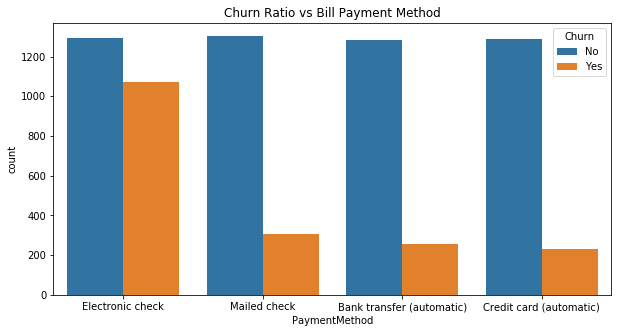

In [27]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Churn Ratio vs Bill Payment Method')
sns.countplot(df['PaymentMethod'],hue=df['Churn'])

###### Inference
* Other than Electronic Check payment, all the other payment method mainted a similiar Subcribed to Unsubcribed ratio.

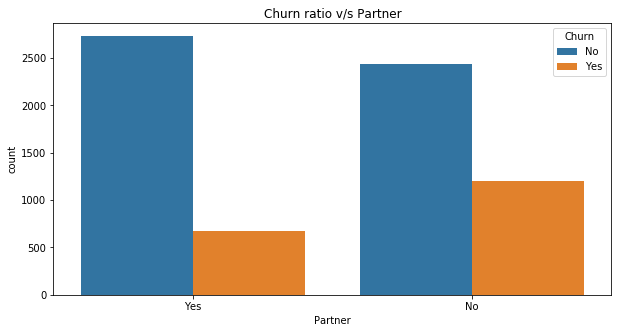

In [28]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Churn ratio v/s Partner')
sns.countplot(df['Partner'],hue=df['Churn'])

* Having a partner service results in lesser Unsubscription.
* Feature will be retained

Text(0.5,1,'Churn analysis for Device Protection')

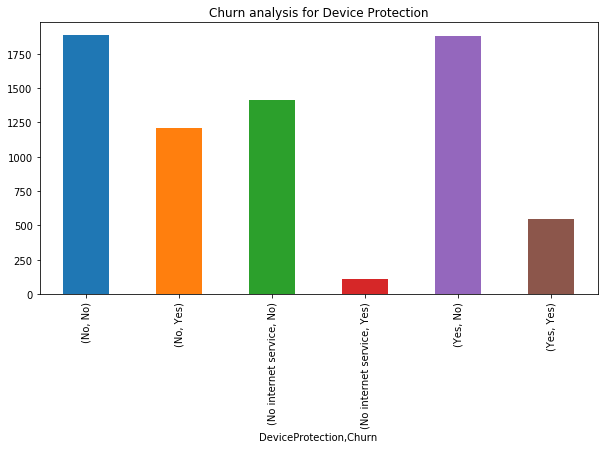

In [29]:
df.groupby('DeviceProtection')['Churn'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title('Churn analysis for Device Protection')


Text(0.5,0,'Churn')

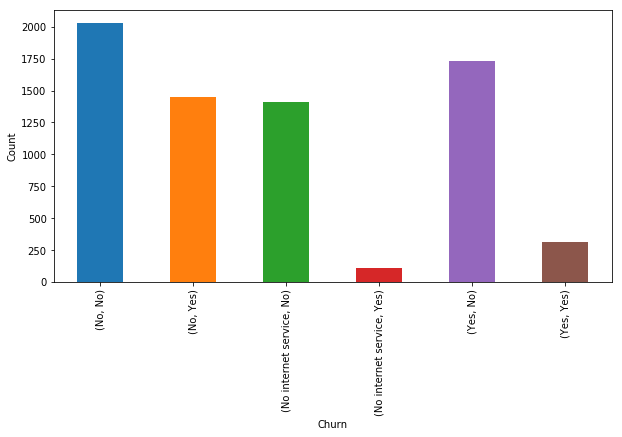

In [30]:
df.groupby('TechSupport')['Churn'].value_counts().plot(kind='bar',figsize=(10,5))
plt.ylabel('Count')
plt.xlabel('Churn')



### Inference
* Subscribers with Device Protection and Tech Support has lesser tendency to unsubscribe

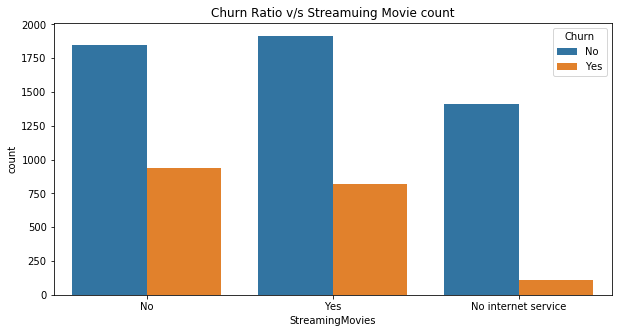

In [31]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Churn Ratio v/s Streamuing Movie count')
sns.countplot(df['StreamingMovies'],hue=df['Churn'])

* An almost constant ratio is maintained for Customer with Streaming Movie serivce and without it

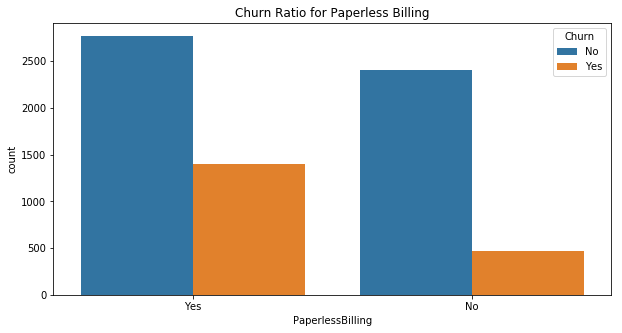

In [32]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Churn Ratio for Paperless Billing')
sns.countplot(df['PaperlessBilling'],hue=df['Churn'])

###### Inference
* Paperless Billing has higher churn ratio

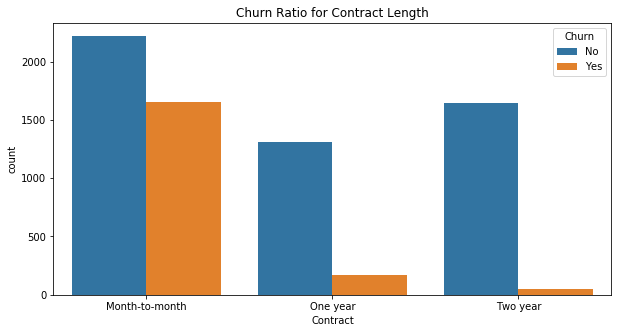

In [33]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Churn Ratio for Contract Length')
sns.countplot(df['Contract'],hue=df['Churn'])

###### Inference
* Customers with Month to Month Subscription have higher chance of churning

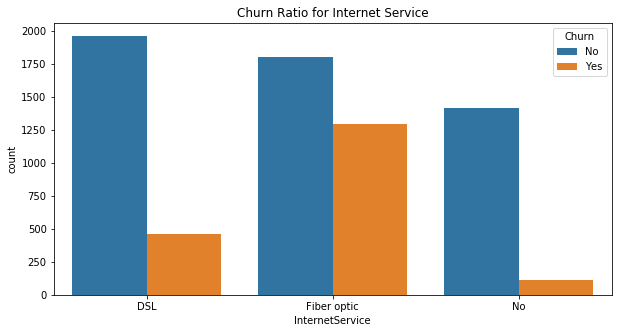

In [34]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Churn Ratio for Internet Service')
sns.countplot(df['InternetService'],hue=df['Churn'])

###### Inference
* Fibre Optic has higher unsubscription

##### 3. Box Plot Representation

In [35]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


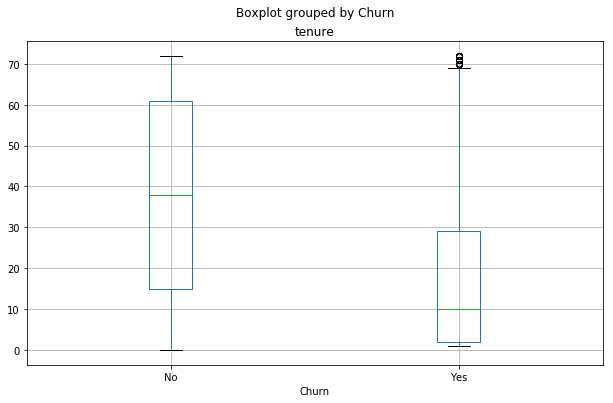

In [36]:
df.boxplot(column='tenure', by='Churn',figsize=(10,6))

###### Inference
* Customer tend to churn in the initial months, rather than after a prelonged length of time

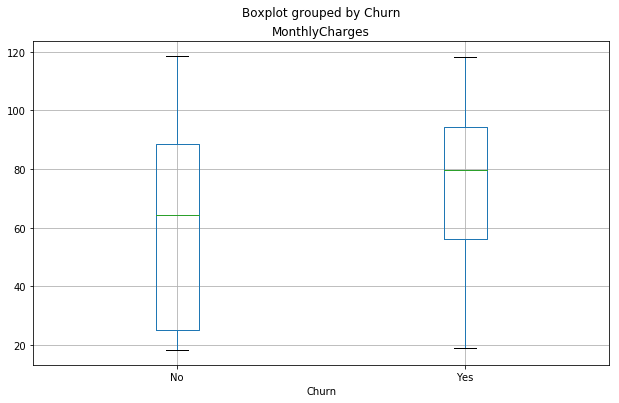

In [37]:
df.boxplot(column='MonthlyCharges', by='Churn',figsize=(10,6))

###### Inference
* Customer paying higher Monthly Charges are highly likely to unsubscribe

## Step 4
## Data Cleaning and Data Preprocessing

* We will have to exclude a few features while training the model.
* Not doing so will result in overfitting of model.

In [38]:
df_copy=df.copy()

In [39]:
list(df_copy.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [40]:
X=df_copy[['SeniorCitizen','Partner','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
 'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges']]
target=df_copy[['Churn']]


In [41]:
target=target['Churn'].map({'Yes':1,'No':0})

In [42]:
target.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [43]:
X['Partner']=X['Partner'].map({'Yes':1,'No':0})

C:\Users\Niraj\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [44]:
X.head()

,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,1,1,No,No phone service,DSL,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,0,0,34,Yes,No,DSL,Yes,Yes,No,No,No,One year,No,Mailed check,56.95
2,0,0,2,Yes,No,DSL,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,0,0,45,No,No phone service,DSL,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


In [45]:
X['PhoneService']=X['PhoneService'].map({'Yes':1,'No':0})
X['MultipleLines']=X['MultipleLines'].map({'Yes':1,'No':0,'No phone service':0})

C:\Users\Niraj\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Niraj\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [46]:
X.head()

,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,1,1,0,0,DSL,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,0,0,34,1,0,DSL,Yes,Yes,No,No,No,One year,No,Mailed check,56.95
2,0,0,2,1,0,DSL,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,0,0,45,0,0,DSL,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,0,0,2,1,0,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


In [47]:
X['OnlineSecurity']=X['OnlineSecurity'].map({'Yes':1,'No':0,'No internet service':0})
X['DeviceProtection']=X['DeviceProtection'].map({'Yes':1,'No':0,'No internet service':0})

C:\Users\Niraj\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Niraj\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [48]:
X['TechSupport']=X['TechSupport'].map({'Yes':1,'No':0,'No internet service':0})
X['StreamingTV']=X['StreamingTV'].map({'Yes':1,'No':0,'No internet service':0})
X['StreamingMovies']=X['StreamingMovies'].map({'Yes':1,'No':0,'No internet service':0})

C:\Users\Niraj\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Niraj\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Niraj\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [49]:
X.head()

,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,1,1,0,0,DSL,0,0,0,0,0,Month-to-month,Yes,Electronic check,29.85
1,0,0,34,1,0,DSL,1,1,0,0,0,One year,No,Mailed check,56.95
2,0,0,2,1,0,DSL,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85
3,0,0,45,0,0,DSL,1,1,1,0,0,One year,No,Bank transfer (automatic),42.30
4,0,0,2,1,0,Fiber optic,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70


In [50]:
X.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [51]:
X.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [52]:
X.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [53]:
X['PaperlessBilling']=X['PaperlessBilling'].map({'Yes':1,'No':0})
X['Contract']=X['Contract'].map({'Month-to-month':2,'Two year':1,'One year':0})
X['PaymentMethod']=X['PaymentMethod'].map({'Electronic check':3,'Mailed check':2,'Bank transfer (automatic)':1,'Credit card (automatic)':0})

C:\Users\Niraj\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Niraj\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Niraj\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [54]:
X.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [55]:
X['InternetService']=X['InternetService'].map({'Fiber optic':2,'DSL':1,'No':0})

C:\Users\Niraj\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [56]:
X.head()

,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,1,1,0,0,1,0,0,0,0,0,2,1,3,29.85
1,0,0,34,1,0,1,1,1,0,0,0,0,0,2,56.95
2,0,0,2,1,0,1,1,0,0,0,0,2,1,2,53.85
3,0,0,45,0,0,1,1,1,1,0,0,0,0,1,42.30
4,0,0,2,1,0,2,0,0,0,0,0,2,1,3,70.70


In [57]:
y = df_copy['Churn'].map({'Yes':1,'No':0})

## Step 5
## Training the model

## Choice of algorithm
* Since the data isn't a small one, using Support Vector Machine won't be convenient.
* Thus we can use either Random Forest Classifier or Logistic Regression
* Since I have greater understanding of Logistic Regression Algorithm, I decided to train my model with it. ;)

* Train-Test Split is required to prevent Overfitting.
* I went for standard 80-20 ratio

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [60]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
prediction_test = LR.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test)

In [61]:
prediction=pd.DataFrame(prediction_test)

In [62]:
prediction.head()

,0
0,0
1,0
2,0
3,1
4,1


## Step 6
### Model Evaluation Metrics

In [63]:
accuracy

0.7863733144073811

* An accuracy score of 0.786 indicates that the model is good enough as it closer to 1, for further understanding we will plot a confusion matrix

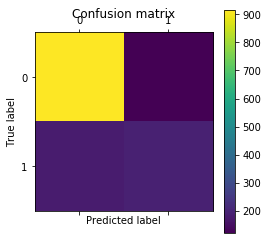

In [64]:
cm = confusion_matrix(y_test, prediction_test)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [65]:
from sklearn.metrics import classification_report

In [66]:
print (classification_report(y_test, prediction_test))

             precision    recall  f1-score   support

          0       0.83      0.88      0.86      1035
          1       0.62      0.52      0.56       374

avg / total       0.78      0.79      0.78      1409



#### Inference
* The model has a good precision and recall score(and thus a good f1_score too) indicating that  the model is a good one.